In [1]:
from pathlib import Path
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
sys.path.append('..')

import training

In [3]:
df = pd.read_csv('../reports/online_augmentation/results.csv')

In [4]:
df

,dataset,aug_perc,num,epoch,ensemble,smape,mase*
0,235k,0.25,0.0,1.0,False,14.465385,2.917459
1,235k,0.25,0.0,1.0,True,14.465385,2.917459
2,235k,0.25,0.0,2.0,False,13.841654,2.821057
3,235k,0.25,0.0,2.0,True,13.996772,2.840867
4,235k,0.25,0.0,3.0,False,13.856559,2.826110
...,...,...,...,...,...,...,...
946,235k,0.75,NaN,12.0,True,13.259362,2.709446
947,235k,0.75,NaN,13.0,True,13.293844,2.718481
948,235k,0.75,NaN,14.0,True,13.205238,2.692749
949,235k,0.75,NaN,NaN,True,13.281435,2.714813


In [8]:
def plot_horizontal_ensembles(experiment_df):

    emax = int(experiment_df['epoch'].max())

    plt.figure(figsize=(16, 8))

    ax = plt.subplot(111)
    for n in sorted(experiment_df['num'].unique()):
        if not n >= 0:
            continue
        tmp = experiment_df[experiment_df['num'] == n]
        base = tmp[~tmp['ensemble']].dropna()
        ax.plot(range(1, emax+1), base['smape'], c='0.5', alpha=0.5)
        ens = tmp[tmp['ensemble']].dropna()
        ax.plot(range(1, emax+1), ens['smape'], c='C0', alpha=0.5)
        ax.scatter([emax], list(experiment_df[(experiment_df['epoch'].isna()) & (experiment_df['num'].isna())]['smape']), c='C1', marker='x')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        

def plot_regular_ensembles(experiment_df):

    emax = int(experiment_df['epoch'].max())
    
    plt.figure(figsize=(16, 8))

    ax = plt.subplot(111)
    for n in sorted(experiment_df['num'].unique()):
        if not n >= 0:
            continue
        tmp = experiment_df[experiment_df['num'] == n]
        base = tmp[~tmp['ensemble']].dropna()
        ax.plot(range(1, emax+1), base['smape'], c='0.5', alpha=0.5)    

    ens = experiment_df[experiment_df['num'].isna() & df_all['epoch'].notna()]

    ax.plot(range(1, emax+1), ens['smape'], c='C0', alpha=0.5)
    ax.scatter([emax], list(experiment_df[experiment_df['num'] < 0]['smape']), c='C1', marker='x')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

## augmentation perc 0.25

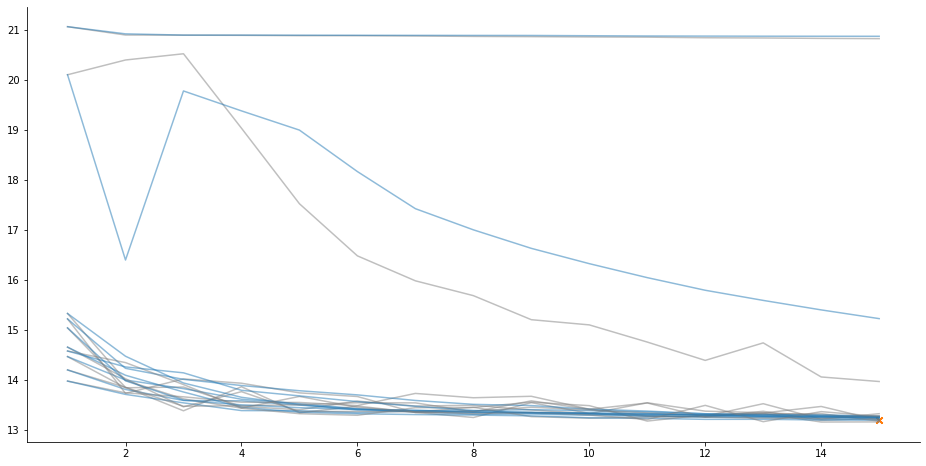

In [9]:
plot_horizontal_ensembles(df[df['aug_perc'] == 0.25])

/home/thanos/.envs/aug/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


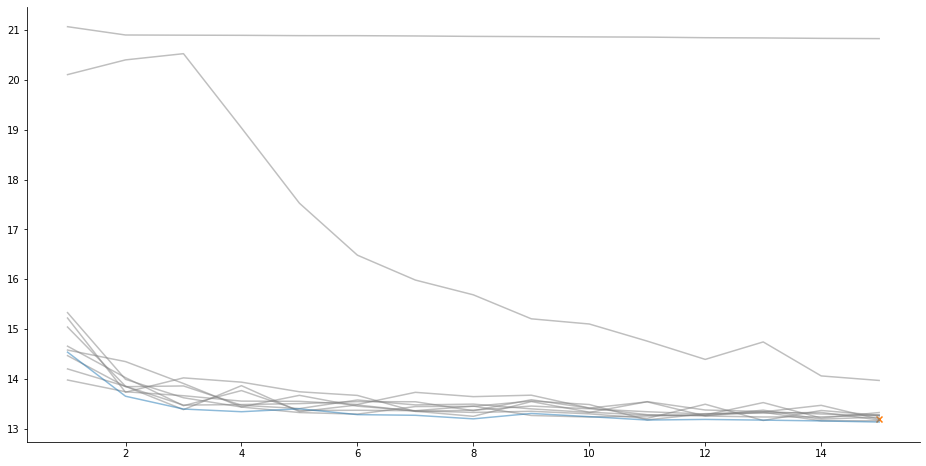

In [10]:
plot_regular_ensembles(df[df['aug_perc'] == 0.25])

## augmentation perc 0.5

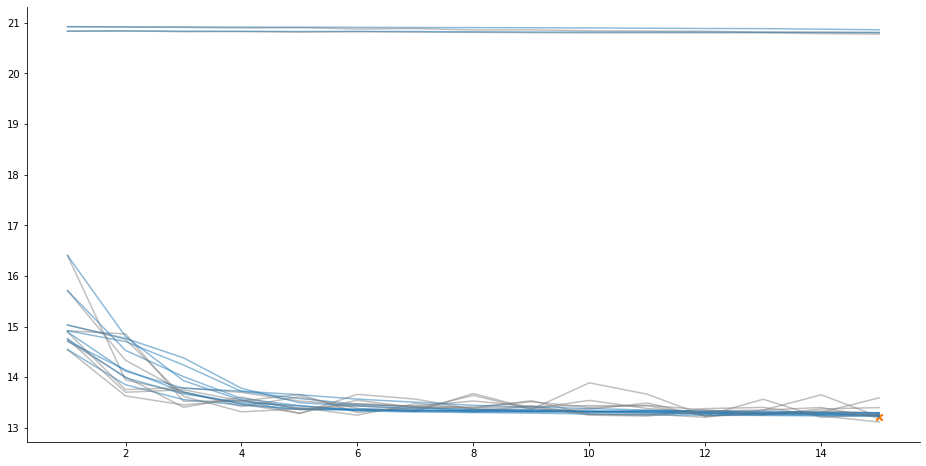

In [12]:
plot_horizontal_ensembles(df[df['aug_perc'] == 0.5])

/home/thanos/.envs/aug/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


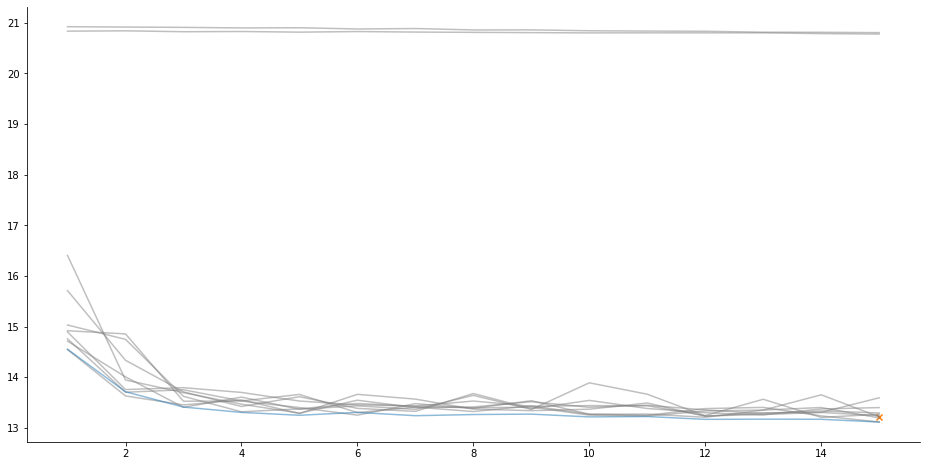

In [16]:
plot_regular_ensembles(df[df['aug_perc'] == 0.5])

## augmentation perc 0.75

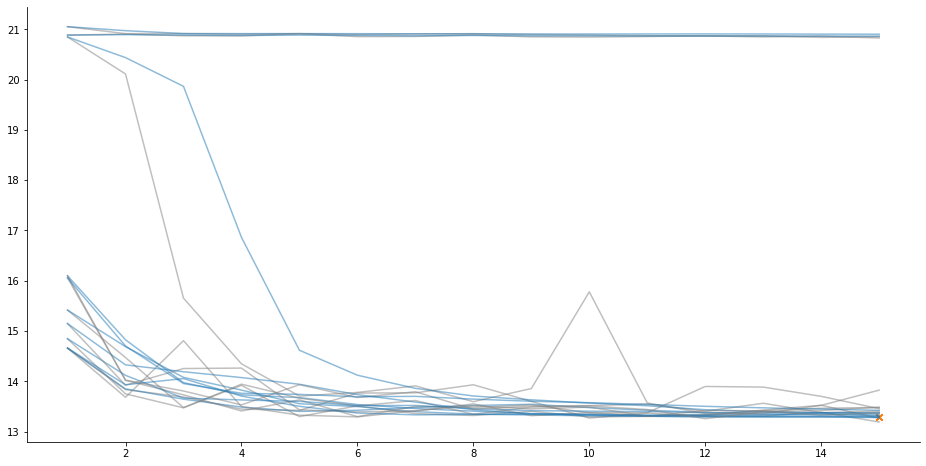

In [14]:
plot_horizontal_ensembles(df[df['aug_perc'] == 0.75])

/home/thanos/.envs/aug/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


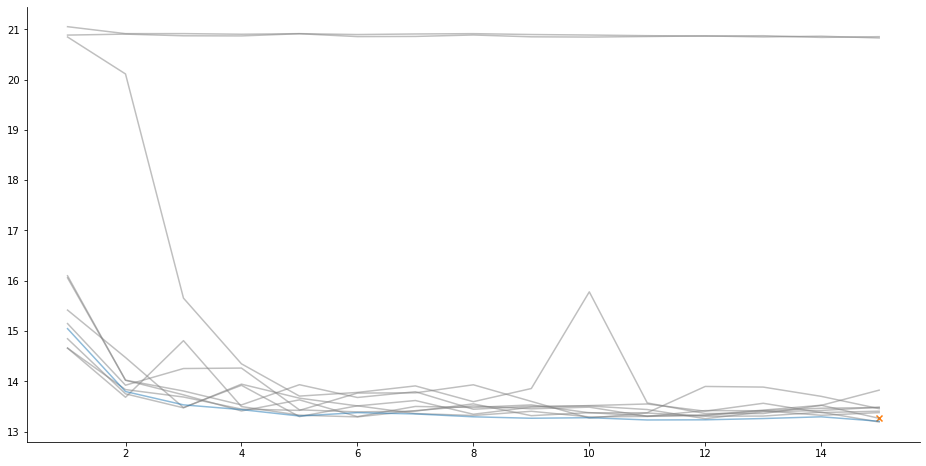

In [17]:
plot_regular_ensembles(df[df['aug_perc'] == 0.75])

(13.0, 13.5)

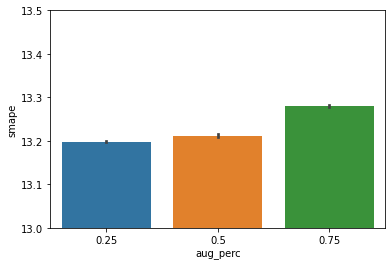

In [22]:
sns.barplot(x='aug_perc', y='smape', data=df[df['epoch'].isna()])
plt.ylim([13, 13.5])